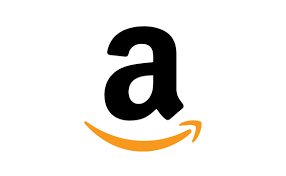
<h2 style="font-face: verdana; font-size: 32px;">Amazon Reviews</h2>
<h3 style="font-face: verdana; font-size: 16px;">Derive rich features for Machine Learning with the Watson Cognitive APIs</h3>
<br><br>

<h3 style="font-face: verdana; font-size: 16px;">The objective of this machine learning model is to predict the rating a user would give a product based on his or her customer review.</h3>

The dataset contains the ID of the reviewer, the product ID, the reviewer's name, a helpfulness rating of the review by other users, the review text, an overall rating of the product, a summary of the review and the time of the review. In this machine learning model, we will only be using the review text and the user's overall rating of the product.
<br><br>

Data fields in the dataset:


    reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
    asin - ID of the product, e.g. 0000013714
    reviewerName - name of the reviewer
    helpful - helpfulness rating of the review, e.g. 2/3
    reviewText - text of the review
    overall - rating of the product
    summary - summary of the review
    unixReviewTime - time of the review (unix time)
    reviewTime - time of the review (raw)

<br><br>
<img src="https://github.com/hackerguy/Amazon/blob/master/SampleReview.jpg?raw=true/">
<br><br>

<h3 style="font-face: verdana; font-size: 16px;">Approach</h3>

We will approach this challenge by first using a traditional multiclassification machine learning approach. We will then explore using IBM Watson Natural Language Understanding to derive additional enhanced features on which to learn a machine learning model.

<h3 style="font-face: verdana; font-size: 16px;">IBM Watson Natural Language Understanding</h3>

IBM Watson™ Natural Language Understanding (NLU) can analyze semantic features of text input, including categories, concepts, emotion, entities, keywords, metadata, relations, semantic roles, and sentiment. In this example, we will utilize the emotion and sentiment features of NLU to create enhanced machine learning features.


<h4 style="font-face: verdana; font-size: 16px;">Emotion</h4>

The emotion feature of NLU allows you to analyze emotion conveyed by specific target phrases or by the document as a whole. You can also enable emotion analysis for entities and keywords that are automatically detected by the service. In this example, we will simply analyze the spooky excerpt as a whole. The emotions we will derive features for are 

- Anger
- Joy
- Sadness
- Fear
- Disgust

Emotion scores range from 0 to 1 for sadness, joy, fear, disgust, and anger. A 0 means the text doesn't convey the emotion, and a 1 means the text definitely carries the emotion.

<h4 style="font-face: verdana; font-size: 16px;">Sentiment</h4>

The sentiment feature of NLU allows you to analyze the sentiment toward specific target phrases and the sentiment of the document as a whole. You can also get sentiment information for detected entities and keywords by enabling the sentiment option for those features. In this example, we will simply analyze the spooky excerpt as a whole.

The sentiment score ranges from -1 (negative sentiment) to 1 (positive sentiment).



# Notebook Flow


**Part 1: [Traditional Machine Learning](#Part-1:-Traditional-Machine-Learning)**
  1. [Read in the Data](#1.-Read-in-the-Data)<br>
  2. [Clean the Data](#2.-Clean-the-Data)<br>
  3. [Feature Engineering](#3.-Feature-Engineering)<br>
  4. [Build ML Pipeline and Learn a Model](#4.-Build-ML-Pipeline-and-Learn-a-Model)<br>
  5. [Evaluate the Model](#5.-Evaluate-the-Model)
    
**Part 2: [Machine Learning using Watson Cognitive APIs](#Part-2:-Machine-Learning-using-Watson-Cognitive-APIs)**
  1. [Set up for Use of the Natural Language Understanding Service](#1.-Set-up-for-Use-of-the-Natural-Language-Understanding-Service)<br>
  2. [Create Enhanced Features using the NLU Service](#2.-Create-Enhanced-Features-using-the-NLU-Service)<br>
  3. [Retrain Model with NLU Features Added](#3.-Retrain-Model-with-NLU-Features-Added)
  4. [Evaluate the Model Learned with NLU Features](#4.-Evaluate-the-Model-Learned-with-NLU-Features)


# Part 1: Traditional Machine Learning

This section will employ a traditional multiclassification machine learning approach to learning a model.

## 1. Read in the Data

### Download and unzip the dataset

In [1]:
import os
if os.path.isfile('reviews_Patio_Lawn_and_Garden_5.gz'):
    os.remove("reviews_Patio_Lawn_and_Garden_5.gz")
if os.path.isfile('reviews_Patio_Lawn_and_Garden_5.json'):
    os.remove("reviews_Patio_Lawn_and_Garden_5.json")

import wget
url = 'https://github.com/hackerguy/Amazon/blob/master/reviews_Patio_Lawn_and_Garden_5.gz?raw=true?raw=true -O reviews_Patio_Lawn_and_Garden_5.json'
wget.download(url)

import gzip
with gzip.open('reviews_Patio_Lawn_and_Garden_5.gz', 'rb') as f:
    file_content = f.read() 

file = open('reviews_Patio_Lawn_and_Garden_5.json','w') 
file.write(file_content) 
file.close() 

### Read in the data set as a Spark DataFrame
#### Infer schema and column names

In [22]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

data = (spark.read
  .format('json')
  .option("inferSchema", "true")
  .load('reviews_Patio_Lawn_and_Garden_5.json'))

### Display the dataframe

In [23]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
data.toPandas().head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B00002N674,"[4, 4]",4,"Good USA company that stands behind their products. I have had to warranty two hoses and they send replacements right out to you. I had one burst after awhile, you could see it buldge for weeks before it went so no suprises. The other one was winter related as I am bad and leave them out most of the time. Highly reccomend. Note the hundred footer is heavy and like wresting an anaconda when its time to put away, but it does have a far reach.","06 21, 2011",A1JZFGZEZVWQPY,"Carter H ""1amazonreviewer@gmail . com""",Great Hoses,1308614400
1,B00002N674,"[0, 0]",5,This is a high quality 8 ply hose. I have had good luck with Gilmour hoses in the past. A good choice in hoses.,"06 9, 2014",A32JCI4AK2JTTG,"Darryl Bennett ""Fuzzy342""","Gilmour 10-58050 8-ply Flexogen Hose 5/8-Inch by 50-Foot, Green",1402272000
2,B00002N674,"[2, 3]",4,"It's probably one of the best hoses I've ever had.Pro's:- It's good enough for most front yards, or small back yards.- It has enough flow (and with the right head) to water plants 25ft away from the nozzle, and water your garden.- It's light weight, and flexible (it does not pose as much of a problem unrolling this hose with kinks as with other hoses I've owned)- The hose is flexible, yet strong. I haven't cut the outside yet.- This hose has been in full sunlight for more than 3 months, and the rubber hasn't cracked yet! I believe it's good quality rubber.cons:- Like with every hose, keeping it outside in the sunshine, the water warms up and starts smelling.My dog don't want to drink from the water coming from this hose.- The hose is only in one color (I wished it was a little less visible in the gardenOtherwise this hose is an excellent garden tool!I bought 2 of them, one 25ft for my front garden, and 50ft for my rear garden.3-4months and still in excellent condition!","05 5, 2012",A3N0P5AAMP6XD2,H B,Very satisfied!,1336176000
3,B00002N674,"[0, 0]",5,"I probably should have bought something a bit more flexible and less rugged since I constantly coil/uncoil it for washing cars, but that's my fault not a product fault.","07 15, 2013",A2QK7UNJ857YG,Jason,Very high quality,1373846400
4,B00002N674,"[1, 1]",5,"I bought three of these 5/8-inch Flexogen hoses--50, 75, and 100 feet--for different areas of yard around the house. After a season of use they've proven to be good hoses. Of course, it's very favorable that they don't leak. But what particularly impresses me about them is their notably light weight and flexibility, which make them a lot easier to handle than my previous hoses. The flexibility diminishes in cold weather, but a garden hose is less useful then anyway.They're not especially prone to kinking, but they're not kink-proof, either, nor do they claim to be. They kink a lot less than one of my old hoses and more than a couple of others, but the latter were fairly stiff, so there was a trade-off.Bottom line: this was a good purchase.","08 5, 2013",AS0CYBAN6EM06,jimmy,Good Hoses,1375660800


### Drop all but the text and overall rating columns and rename the text review column

In [24]:
data = data.select('reviewText', 'overall')
data = data.withColumnRenamed('reviewText', 'text')

### Show the schema of the data including data types

In [25]:
data.printSchema()

root
 |-- text: string (nullable = true)
 |-- overall: double (nullable = true)



### Dataset Overview - number of rows and columns

In [26]:
print("There are {} rows in the dataset.".format(str(data.count())))
print("There are {} columns in the dataset.".format(str(len(data.columns))))

There are 13272 rows in the dataset.
There are 2 columns in the dataset.


## 2. Clean the Data

### Drop any rows with null values

In [27]:
data = data.na.drop()
print("There are {} rows in the dataset.".format(str(data.count())))
print("There are {} columns in the dataset.".format(str(len(data.columns))))

There are 13272 rows in the dataset.
There are 2 columns in the dataset.


### Convert numerical rating into positive (1.0) score if overall rating is a 4 or 5 and a negative (0.0) score if the overall rating is a 1, 2 or 3

In [28]:
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
udf = udf(lambda overall: 1.0 if overall > 3 else 0.0, FloatType())

In [29]:
data = (data.withColumn('label', udf(data['overall'])))

In [30]:
data.select('overall', 'label').sample(False, 0.1, 1).toPandas().head()

,overall,label
0,4,1
1,5,1
2,5,1
3,2,0
4,3,0


### Drop the original overall rating column

In [31]:
data = data.drop('overall')
data.sample(False, 0.1, 1).toPandas().head()

text  \
0  It's probably one of the best hoses I've ever had.Pro's:- It's good enough for most front yards, or small back yards.- It has enough flow (and with the right head) to water plants 25ft away from the nozzle, and water your garden.- It's light weight, and flexible (it does not pose as much of a problem unrolling this hose with kinks as with other hoses I've owned)- The hose is flexible, yet strong. I haven't cut the outside yet.- This hose has been in full sunlight for more than 3 months, and the rubber hasn't cracked yet! I believe it's good quality rubber.cons:- Like with every hose, keeping it outside in the sunshine, the water warms up and starts smelling.My dog don't want to drink from the water coming from this hose.- The hose is only in one color (I wished it was a little less visible in the gardenOtherwise this hose is an excellent garden tool!I bought 2 of them, one 25ft for my front garden, and 50ft for my rear garden.3-4months and still in excellent condition!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

### Balance the data label values and use a subset of the data for processing efficiency

In [32]:
print('The number of records in the original data set is {}.'.format(data.count()))
print('The number of rows labeled 0.0 in the original data set is {}.'.format(data.filter(data['label'] == 0.0).count()))
print('The number of rows labeled 1.0 in the original data set is {}.'.format(data.filter(data['label'] == 1.0).count()))

The number of records in the original data set is 13272.
The number of rows labeled 0.0 in the original data set is 2851.
The number of rows labeled 1.0 in the original data set is 10421.


In [33]:
# Set a limit to the number of rows associated with each label
limit = 100

In [34]:
data = data.sample(False, 0.1, 0)
data0 = data.filter(data['label'] == 0.0).limit(limit)
data1 = data.filter(data['label'] == 1.0).limit(limit)
data = data0.union(data1)

In [35]:
print('The number of records in the data set is now {}.'.format(data.count()))
print('The number of rows labeled 0.0 in the data set is now {}.'.format(data.filter(data['label'] == 0.0).count()))
print('The number of rows labeled 1.0 in the data set is now {}.'.format(data.filter(data['label'] == 1.0).count()))

The number of records in the data set is now 200.
The number of rows labeled 0.0 in the data set is now 100.
The number of rows labeled 1.0 in the data set is now 100.


### Remove punctuation from the text

In [36]:
from pyspark.ml.feature import SQLTransformer
removePunctuationTrans = SQLTransformer(
    statement="""SELECT *, TRANSLATE(text,',.:;!?@#$%^&*()+=-`~{}[]|\/''"<>','') AS textNoPunctuation FROM __THIS__""")
data = removePunctuationTrans.transform(data)
data.select('text', 'textNoPunctuation').toPandas().head()

,text,textNoPunctuation
0,"I remember my dad using a sprinkler like this when I was a kid (I'm 61). We are in the middle of a drought here in Texas and I was tired of having to move the sprinkler and thought this would solve my problem. First of all, this is a VERY heavy sprinkler and is awkward to pick up and move. If you have any trouble lifting heavy objects, get something else. It has to be moved. You can't drag it and you can't turn it around and make it go the other direction. I have found I have to check on it as often, if not more often, than I was moving my oscillating sprinkler. First, it jumped off the hose/track and was climbing the fence. Then, it kinked the hose and cut off the water. Finally, it dug itself a hole and had mud all over the back wheels. Tried it another time and it just stopped spraying water. No kink this time, checked the button on the bottom, couldn't get it going again. I went back to my oscillating sprinkler. At least it's easy to move around. I think you need to use this on a very flat, very straight lawn. Mine is bumpy and I need it to make a couple of gentle curves. It didn't work for me. I like the spray it puts out and would use it as a stationery sprinkler if it weren't so heavy to move.",I remember my dad using a sprinkler like this when I was a kid I'm 61 We are in the middle of a drought here in Texas and I was tired of having to move the sprinkler and thought this would solve my problem First of all this is a VERY heavy sprinkler and is awkward to pick up and move If you have any trouble lifting heavy objects get something else It has to be moved You can't drag it and you can't turn it around and make it go the other direction I have found I have to check on it as often if not more often than I was moving my oscillating sprinkler First it jumped off the hosetrack and was climbing the fence Then it kinked the hose and cut off the water Finally it dug itself a hole and had mud all over the back wheels Tried it another time and it just stopped spraying water No kink this time checked the button on the bottom couldn't get it going again I went back to my oscillating sprinkler At least it's easy to move around I think you need to use this on a very flat very straight lawn Mine is bumpy and I need it to make a couple of gentle curves It didn't work for me I like the spray it puts out and would use it as a stationery sprinkler if it weren't so heavy to move
1,"I purchased 6 of these hoses with what was supposed to be a lifetime guarantee. After a short time, the end on one of the hoses started leaking so I contacted the manufacturer and got a replacement. A year later another hose started leaking and I got another replacement. Then another hose started leaking but the company would no longer honor the warranty! Now Gilmour is selling them. But it's the same hose - ""Flexogen"". The hose itself it actually quite good if you don't mind replacing the hose ends eventually, I've had to replace every end on every Flexogen hose that I have.Keep in mind that I bought hoses from Flexogen but that company no longer exists and Gilmour would not honor the warranty on those hoses even though Gilmour is now selling them. Also note that Flexogen is a patented hose. Lifetime warranty isn't much good when the company gets bought or taken over by another company and the new company (Gilmour) won't honor the warranty. And who wants to have to keep sending in hose parts to get a replacement every year or two.Let me reiterate, Gilmour would not honor the warranty on my Flexogen hoses. I wrote to them multiple times and was told (without explanation) that Gilmour would not replace the defective hoses. If you buy these hoses expecting a lifetime warranty, you may not get it.On the Gilmour website, there is no longer any information relating to Flexogen hose warranty or on how to have a Flexogen hose replaced. On Amazon, it does say ""This heavy-duty garden hose is made in the USA and backed by a lifetime guarante

In [37]:
data = data.drop('text').withColumnRenamed('textNoPunctuation', 'text')
data.toPandas().head()

,label,text
0,0,I remember my dad using a sprinkler like this when I was a kid I'm 61 We are in the middle of a drought here in Texas and I was tired of having to move the sprinkler and thought this would solve my problem First of all this is a VERY heavy sprinkler and is awkward to pick up and move If you have any trouble lifting heavy objects get something else It has to be moved You can't drag it and you can't turn it around and make it go the other direction I have found I have to check on it as often if not more often than I was moving my oscillating sprinkler First it jumped off the hosetrack and was climbing the fence Then it kinked the hose and cut off the water Finally it dug itself a hole and had mud all over the back wheels Tried it another time and it just stopped spraying water No kink this time checked the button on the bottom couldn't get it going again I went back to my oscillating sprinkler At least it's easy to move around I think you need to use this on a very flat very straight lawn Mine is bumpy and I need it to make a couple of gentle curves It didn't work for me I like the spray it puts out and would use it as a stationery sprinkler if it weren't so heavy to move
1,0,I purchased 6 of these hoses with what was supposed to be a lifetime guarantee After a short time the end on one of the hoses started leaking so I contacted the manufacturer and got a replacement A year later another hose started leaking and I got another replacement Then another hose started leaking but the company would no longer honor the warranty Now Gilmour is selling them But it's the same hose Flexogen The hose itself it actually quite good if you don't mind replacing the hose ends eventually I've had to replace every end on every Flexogen hose that I haveKeep in mind that I bought hoses from Flexogen but that company no longer exists and Gilmour would not honor the warranty on those hoses even though Gilmour is now selling them Also note that Flexogen is a patented hose Lifetime warranty isn't much good when the company gets bought or taken over by another company and the new company Gilmour won't honor the warranty And who wants to have to keep sending in hose parts to get a replacement every year or twoLet me reiterate Gilmour would not honor the warranty on my Flexogen hoses I wrote to them multiple times and was told without explanation that Gilmour would not replace the defective hoses If you buy these hoses expecting a lifetime warranty you may not get itOn the Gilmour website there is no longer any information relating to Flexogen hose warranty or on how to have a Flexogen hose replaced On Amazon it does say This heavyduty garden hose is made in the USA and backed by a lifetime guarantee It also says Lifetime Guarantee on the front of the hose package Gilmour is now owned by the Robert Bosch Corp so probably even less chance of getting a warranty replacement
2,0,The bee guards worked great but the reason I gave it only three stars is the price Over a buck a piece is more than it should be in my option If it wasn't a gift to my dad who enjoys his hummingbirds I would have kept looking for a cheaper place to purchase them
3,0,I read the other reviewers who had similar problems before I bought this I also read the reviews raving about this hose Since these hoses are maid from remnants I suppose its a matter of luck as to which hose you get My luck wasn't good The hose had permanent kinks and the vinyl skin had bubbles where it was separating from the hoseReturned it immediately
4,0,Am writing this while cooking some chicken on a WSJ i found last week in new condition for a Hamilton Let me preface my comments by stating that I have a 22inch Weber with hinged grate that I loveThe WSJ is small somewhat solidly constructed mine while unused has rust rings around the handle welds that go through the cover not goodHowever most folks use this Weber as a portable grill Weber for gawd's sakes incorporate some form of simple mechanism ON A

## 3. Feature Engineering

### Tokenize the text

In [38]:
from pyspark.ml.feature import Tokenizer
from pyspark.sql.functions import col, udf
from pyspark.sql.types import IntegerType

tokenizer = Tokenizer(inputCol="text", outputCol="words")

countTokens = udf(lambda words: len(words), IntegerType())

tokenized = tokenizer.transform(data)
(tokenized.select("text", "words")
    .withColumn("#tokens", countTokens(col("words"))).toPandas().head())

,text,words,#tokens
0,I remember my dad using a sprinkler like this when I was a kid I'm 61 We are in the middle of a drought here in Texas and I was tired of having to move the sprinkler and thought this would solve my problem First of all this is a VERY heavy sprinkler and is awkward to pick up and move If you have any trouble lifting heavy objects get something else It has to be moved You can't drag it and you can't turn it around and make it go the other direction I have found I have to check on it as often if not more often than I was moving my oscillating sprinkler First it jumped off the hosetrack and was climbing the fence Then it kinked the hose and cut off the water Finally it dug itself a hole and had mud all over the back wheels Tried it another time and it just stopped spraying water No kink this time checked the button on the bottom couldn't get it going again I went back to my oscillating sprinkler At least it's easy to move around I think you need to use this on a very flat very straight lawn Mine is bumpy and I need it to make a couple of gentle curves It didn't work for me I like the spray it puts out and would use it as a stationery sprinkler if it weren't so heavy to move,"[i, remember, my, dad, using, a, sprinkler, like, this, when, i, was, a, kid, i'm, 61, , we, are, in, the, middle, of, a, drought, here, in, texas, and, i, was, tired, of, having, to, move, the, sprinkler, and, thought, this, would, solve, my, problem, , first, of, all, this, is, a, very, heavy, sprinkler, and, is, awkward, to, pick, up, and, move, , if, you, have, any, trouble, lifting, heavy, objects, get, something, else, , it, has, to, be, moved, , you, can't, drag, it, and, you, can't, turn, it, around, and, make, it, go, the, other, direction, , ...]",262
1,I purchased 6 of these hoses with what was supposed to be a lifetime guarantee After a short time the end on one of the hoses started leaking so I contacted the manufacturer and got a replacement A year later another hose started leaking and I got another replacement Then another hose started leaking but the company would no longer honor the warranty Now Gilmour is selling them But it's the same hose Flexogen The hose itself it actually quite good if you don't mind replacing the hose ends eventually I've had to replace every end on every Flexogen hose that I haveKeep in mind that I bought hoses from Flexogen but that company no longer exists and Gilmour would not honor the warranty on those hoses even though Gilmour is now selling them Also note that Flexogen is a patented hose Lifetime warranty isn't much good when the company gets bought or taken over by another company and the new company Gilmour won't honor the warranty And who wants to have to keep sending in hose parts to get a replacement every year or twoLet me reiterate Gilmour would not honor the warranty on my Flexogen hoses I wrote to them multiple times and was told without explanation that Gilmour would not replace the defective hoses If you buy these hoses expecting a lifetime warranty you may not get itOn the Gilmour website there is no longer any information relating to Flexogen hose warranty or on how to have a Flexogen hose replaced On Amazon it does say This heavyduty garden hose is made in the USA and backed by a lifetime guarantee It also says Lifetime Guarantee on the front of the hose package Gilmour is now owned by the Robert Bosch Corp so probably even less chance of getting a warranty replacement,"[i, purchased, 6, of, these, hoses, with, what, was, supposed, to, be, a, lifetime, guarantee, after, a, short, time, the, end, on, one, of, the, hoses, started, leaking, so, i, contacted, the, manufacturer, and, got, a, replacement, a, year, later, another, hose, started, leaking, and, i, got, another, replacement, then, another, hose, started, leaking, but, the, company, would, no, longer, honor, the, warranty, now, gilmour, is, selling, them, but, it's, the, same, hose, , flexogen, the, hose, itself, it, ac

### Remove common words

In [39]:
from pyspark.ml.feature import StopWordsRemover

remover = StopWordsRemover(inputCol="words", outputCol="filtered").setCaseSensitive(False)
removed = remover.transform(tokenized)
removed.select("text", "words", "filtered" ).toPandas().head()

,text,words,filtered
0,I was excited to try this out because about a month ago we had a mice problem in our house I used the Nooski in an area that the mice seemed to love and I also had two snap traps down I ended up catching 5 mice with the snap traps and none with the Nooski all using the same bait We may have also had a misfire once we're not sure if it was a mouse or something we didOne positive about the Nooski is that it is supposed to be safe for your pets That's one thing that concerns me with the snap traps and I have to make sure I put them only in places the pets can't get toI wish this would have worked but we just didn't have any luck with it The snap traps remain the most effective for us,"[i, was, excited, to, try, this, out, because, about, a, month, ago, we, had, a, mice, problem, in, our, house, i, used, the, nooski, in, an, area, that, the, mice, seemed, to, love, and, i, also, had, two, snap, traps, down, i, ended, up, catching, 5, mice, with, the, snap, traps, and, none, with, the, nooski, all, using, the, same, bait, we, may, have, also, had, a, misfire, once, we're, not, sure, if, it, was, a, mouse, or, something, we, didone, positive, about, the, nooski, is, that, it, is, supposed, to, be, safe, for, your, pets, that's, one, thing, that, ...]","[excited, try, month, ago, mice, problem, house, used, nooski, area, mice, seemed, love, also, two, snap, traps, ended, catching, 5, mice, snap, traps, none, nooski, using, bait, may, also, misfire, we're, sure, mouse, something, didone, positive, nooski, supposed, safe, pets, that's, one, thing, concerns, snap, traps, make, sure, put, places, pets, can't, get, toi, wish, would, worked, didn't, luck, snap, traps, remain, effective, us]"
1,This trap uses a tight fitting rubber band that is ejected from the device and placed around the neck of the mouse It is supposed to kill the mouse quickly with the mouse being dead immediately There are 10 rubber bands in the package so that the device can be used 10 timesI've tried a number of mouse traps over the years This one works very effectively as judged by killing the mouse however the mouse seems to be strangled and not killed with a broken neck The fact that the jaw seemed to be dislocated and that the mouse had moved several feet from the trap indicates that it lived a while trying to escape the situation I was not happy about this and would not purchase the product nor use it again I know that other traps are also hit and miss but this one had placed the rubber band directly around the neck as it should but still the result was not as predicted While it worked I was not happy with the thought that the mouse might have suffered as it died,"[this, trap, uses, a, tight, fitting, rubber, band, that, is, ejected, from, the, device, and, placed, around, the, neck, of, the, mouse, , it, is, supposed, to, kill, the, mouse, quickly, with, the, mouse, being, dead, immediately, , there, are, 10, rubber, bands, in, the, package, so, that, the, device, can, be, used, 10, timesi've, tried, a, number, of, mouse, traps, over, the, years, , this, one, works, very, effectively, as, judged, by, killing, the, mouse, however, the, mouse, seems, to, be, strangled, and, not, killed, with, a, broken, neck, , the, fact, that, the, jaw, seemed, to, be, dislocated, ...]","[trap, uses, tight, fitting, rubber, band, ejected, device, placed, around, neck, mouse, , supposed, kill, mouse, quickly, mouse, dead, immediately, , 10, rubber, bands, package, device, used, 10, timesi've, tried, number, mouse, traps, years, , one, works, effectively, judged, killing, mouse, however, mouse, seems, strangled, killed, broken, neck, , fact, jaw, seemed, dislocated, mouse, moved, several, feet, trap, indicates, lived, trying, escape, situation, , happy, would, purchase, product, use, , know, traps, also, hit, miss, one, placed, rubber, band, directly, around, neck, still, result, predicted, , worked, happy, thought, mouse, might, suffered, died]"
2,Yesterday

### Show list of common words removed

In [40]:
from __future__ import print_function
[print(x) for x in remover.getStopWords()]

i
me
my
myself
we
our
ours
ourselves
you
your
yours
yourself
yourselves
he
him
his
himself
she
her
hers
herself
it
its
itself
they
them
their
theirs
themselves
what
which
who
whom
this
that
these
those
am
is
are
was
were
be
been
being
have
has
had
having
do
does
did
doing
a
an
the
and
but
if
or
because
as
until
while
of
at
by
for
with
about
against
between
into
through
during
before
after
above
below
to
from
up
down
in
out
on
off
over
under
again
further
then
once
here
there
when
where
why
how
all
any
both
each
few
more
most
other
some
such
no
nor
not
only
own
same
so
than
too
very
s
t
can
will
just
don
should
now
d
ll
m
o
re
ve
y
ain
aren
couldn
didn
doesn
hadn
hasn
haven
isn
ma
mightn
mustn
needn
shan
shouldn
wasn
weren
won
wouldn


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

### Hash the words

In [41]:
from pyspark.ml.feature import HashingTF

hashingTF = HashingTF(inputCol="filtered", outputCol="rawFeatures", numFeatures=100)
featurizedData = hashingTF.transform(removed)
featurizedData.select("text", "filtered", "rawFeatures").toPandas().head()

,text,filtered,rawFeatures
0,I remember my dad using a sprinkler like this when I was a kid I'm 61 We are in the middle of a drought here in Texas and I was tired of having to move the sprinkler and thought this would solve my problem First of all this is a VERY heavy sprinkler and is awkward to pick up and move If you have any trouble lifting heavy objects get something else It has to be moved You can't drag it and you can't turn it around and make it go the other direction I have found I have to check on it as often if not more often than I was moving my oscillating sprinkler First it jumped off the hosetrack and was climbing the fence Then it kinked the hose and cut off the water Finally it dug itself a hole and had mud all over the back wheels Tried it another time and it just stopped spraying water No kink this time checked the button on the bottom couldn't get it going again I went back to my oscillating sprinkler At least it's easy to move around I think you need to use this on a very flat very straight lawn Mine is bumpy and I need it to make a couple of gentle curves It didn't work for me I like the spray it puts out and would use it as a stationery sprinkler if it weren't so heavy to move,"[remember, dad, using, sprinkler, like, kid, i'm, 61, , middle, drought, texas, tired, move, sprinkler, thought, would, solve, problem, , first, heavy, sprinkler, awkward, pick, move, , trouble, lifting, heavy, objects, get, something, else, , moved, , can't, drag, can't, turn, around, make, go, direction, , found, check, often, often, moving, oscillating, sprinkler, , first, jumped, hosetrack, climbing, fence, , kinked, hose, cut, water, , finally, dug, hole, mud, back, wheels, , tried, another, time, stopped, spraying, water, , kink, time, checked, button, bottom, couldn't, get, going, , went, back, oscillating, sprinkler, , least, it's, easy, move, around, , think, ...]","(1.0, 5.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 3.0, 2.0, 7.0, 1.0, 1.0, 0.0, 4.0, 1.0, 0.0, 0.0, 2.0, 1.0, 1.0, 5.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 4.0, 0.0, 0.0, 0.0, 1.0, 4.0, 0.0, 5.0, 0.0, 3.0, 1.0, 3.0, 3.0, 1.0, 0.0, 2.0, 2.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 18.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 2.0, 1.0, 0.0, 7.0, 2.0, 0.0, 1.0, 2.0, 0.0, 1.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0)"
1,I purchased 6 of these hoses with what was supposed to be a lifetime guarantee After a short time the end on one of the hoses started leaking so I contacted the manufacturer and got a replacement A year later another hose started leaking and I got another replacement Then another hose started leaking but the company would no longer honor the warranty Now Gilmour is selling them But it's the same hose Flexogen The hose itself it actually quite good if you don't mind replacing the hose ends eventually I've had to replace every end on every Flexogen hose that I haveKeep in mind that I bought hoses from Flexogen but that company no longer exists and Gilmour would not honor the warranty on those hoses even though Gilmour is now selling them Also note that Flexogen is a patented hose Lifetime warranty isn't much good when the company gets bought or taken over by another company and the new company Gilmour won't honor the warranty And who wants to have to keep sending in hose parts to get a replacement every year or twoLet me reiterate Gilmour would not honor the warranty on my Flexogen hoses I wrote to them multiple times and was told without explanation that Gilmour would not replace the defective hoses If you buy these hoses expecting a lifetime warranty you may not get itOn the Gilmour website there is no longer any information relating to Flexogen hose warranty or on how to have a Flexogen hose replaced On Amazon it does say This heavyduty garden hose is made in the USA and backed by a lifetime guarantee It also says Lifetime Guarantee on the front of the hose package

### Inverse weight words that occur frequently across all text

In [42]:
from pyspark.ml.feature import IDF

idf = IDF(inputCol="rawFeatures", outputCol="features")
idfModel = idf.fit(featurizedData)
rescaledData = idfModel.transform(featurizedData)

rescaledData.select("text", "rawFeatures", "features").toPandas().head()

,text,rawFeatures,features
0,I was excited to try this out because about a month ago we had a mice problem in our house I used the Nooski in an area that the mice seemed to love and I also had two snap traps down I ended up catching 5 mice with the snap traps and none with the Nooski all using the same bait We may have also had a misfire once we're not sure if it was a mouse or something we didOne positive about the Nooski is that it is supposed to be safe for your pets That's one thing that concerns me with the snap traps and I have to make sure I put them only in places the pets can't get toI wish this would have worked but we just didn't have any luck with it The snap traps remain the most effective for us,"(0.0, 3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 2.0, 1.0, 0.0, 1.0, 2.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 3.0, 2.0, 2.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 2.0, 0.0, 3.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 2.68975698238, 0.0, 0.0, 0.0, 0.668575919829, 0.0, 0.0, 1.91899897241, 0.0, 0.0, 0.0, 0.0, 0.0, 4.16250012407, 0.0, 0.0, 1.17617052301, 0.884464300262, 0.0, 0.0, 2.08125006204, 1.37147927533, 0.0, 0.860653651569, 1.35666418955, 0.792445401542, 0.770705414906, 0.0, 0.0, 0.728593929556, 0.921278273385, 0.999239814855, 0.0, 0.0, 0.0, 0.0, 0.0, 3.72858569254, 0.792445401542, 0.933857055592, 0.0, 1.02663878904, 0.0, 0.541130973261, 0.0, 0.0, 3.3409504981, 1.58489080308, 2.35234104603, 0.0, 1.39128190263, 1.19243104389, 1.22576746415, 1.24286189751, 0.0, 1.27795321732, 1.08226194652, 0.0, 2.09440416621, 0.0, 1.11365016603, 0.0, 0.61195702583, 0.0, 0.946596081369, 0.946596081369, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.803495237729, 0.0, 0.803495237729, 0.0, 1.04062503102, 0.860653651569, 1.26025364022, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.78177665507, 0.0, 0.0, 0.933857055592, 0.0, 0.0, 0.0, 0.0)"
1,This trap uses a tight fitting rubber band that is ejected from the device and placed around the neck of the mouse It is supposed to kill the mouse quickly with the mouse being dead immediately There are 10 rubber bands in the package so that the device can be used 10 timesI've tried a number of mouse traps over the years This one works very effectively as judged by killing the mouse however the mouse seems to be strangled and not killed with a broken neck The fact that the jaw seemed to be dislocated and that the mouse had moved several feet from the trap indicates that it lived a while trying to escape the situation I was not happy about this and would not purchase the product nor use it again I know that other traps are also hit and miss but this one had placed the rubber band directly around the neck as it should but still the result was not as predicted While it worked I was not happy with the thought that the mouse might have suffered as it died,"(1.0, 1.0, 3.0, 1.0, 0.0, 3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 3.0, 1.0, 3.0, 1.0, 0.0, 0.0, 2.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 8.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 1.0, 0.0, 1.0, 2.0, 0.0, 0.0, 2.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 1.0, 1.0, 3.0, 2.0, 0.0, 1.0, 0.0, 0.0, 5.0, 7.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 2.0, 0.0, 1.0, 1.0, 1.0, 2.0, 2.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0)","(0.933857055592, 0.896585660795, 5.15935790881, 1.05480966601, 0.0, 2.00572775949, 0.0, 0.0, 0.0, 1.22576746415, 0.0, 1.17617052301, 2.65339290079, 0.621173680935, 3.12187509305, 0.708185057924, 0.0, 0.0, 1.76892860052, 0.0, 1.43667485878, 0.0, 1.37147927533, 0.0, 0.0, 5.4266567582, 0.0, 0.770705414906, 0.0, 0.0, 0.728593929556, 0.921278273385, 0.0, 0.0, 0.0, 0.0, 0.0, 1.701

## 4. Build ML Pipeline and Learn a Model

### Use Logistic Regression Algorithm to predict author

In [43]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol = "label", regParam=0.0, threshold=0.5)

### Define the machine learning pipeline

In [44]:
stages = [removePunctuationTrans, tokenizer, remover, hashingTF, idf, lr]
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)

### Display the parameter setting of the pipeline stages

In [45]:
print("Remove Punctuation SQL Transformer:")
print(removePunctuationTrans.explainParams())
print("*************************")
print(tokenizer.explainParams())
print("*************************")
print("Tokenizer:")
print(tokenizer.explainParams())
print("*************************")
print("Remover:")
print(remover.explainParams())
print("*************************")
print("HashingTF:")
print(hashingTF.explainParams())
print("*************************")
print("IDF:")
print(idf.explainParams())
print("*************************")
print("LogisticRegression:")
print(lr.explainParams())
print("*************************")
print("Pipeline:")
print(pipeline.explainParams())

Remove Punctuation SQL Transformer:
statement: SQL statement (current: SELECT *, TRANSLATE(text,',.:;!?@#$%^&*()+=-`~{}[]|\/''"<>','') AS textNoPunctuation FROM __THIS__)
*************************
inputCol: input column name. (current: text)
outputCol: output column name. (default: Tokenizer_47c8b801072eece644fc__output, current: words)
*************************
Tokenizer:
inputCol: input column name. (current: text)
outputCol: output column name. (default: Tokenizer_47c8b801072eece644fc__output, current: words)
*************************
Remover:
caseSensitive: whether to do a case sensitive comparison over the stop words (default: False, current: False)
inputCol: input column name. (current: words)
outputCol: output column name. (default: StopWordsRemover_425bad82d4a97af0430f__output, current: filtered)
stopWords: The words to be filtered out (default: [u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'

### Split the dataset into training and test data sets

In [46]:
train, test = data.randomSplit([70.0,30.0], seed=1)
print('The number of records in the training data set is {}.'.format(train.count()))
print('The number of rows labeled 0.0 in the training data set is {}.'.format(train.filter(train['label'] == 0.0).count()))
print('The number of rows labeled 1.0 in the training data set is {}.'.format(train.filter(train['label'] == 1.0).count()))
print("")
print('The number of records in the test data set is {}.'.format(test.count()))
print('The number of rows labeled 0.0 in the test data set is {}.'.format(test.filter(test['label'] == 0.0).count()))
print('The number of rows labeled 1.0 in the test data set is {}.'.format(test.filter(test['label'] == 1.0).count()))

The number of records in the training data set is 144.
The number of rows labeled 0.0 in the training data set is 77.
The number of rows labeled 1.0 in the training data set is 67.

The number of records in the test data set is 56.
The number of rows labeled 0.0 in the test data set is 23.
The number of rows labeled 1.0 in the test data set is 33.


### Train the model using the training data set

In [47]:
model = pipeline.fit(train)

## 5. Evaluate the Model

### Make predictions using the test data set

In [48]:
predictions = model.transform(test)

In [49]:
print('The number of rows with prediction of 0.0 is {}.'.format(predictions.filter(predictions['prediction'] == 0.0).count()))
print('The number of rows with prediction of 1.0 is {}.'.format(predictions.filter(predictions['prediction'] == 1.0).count()))

The number of rows with prediction of 0.0 is 22.
The number of rows with prediction of 1.0 is 35.


In [50]:
predictions.select('label', 'prediction', 'text').sample(False, 0.1, 1).toPandas().head()

,label,prediction,text
0,0,0,I have a small backyard garden and it can really be a chore to pull on a heavy hose and to keep it from crushing plants as I move around the garden to water So yesterday I disconnected the heavyduty rubber hose and connected this Lime Green expanding hose Even before turning on the water I could feel how lightweight it wasI turned on the water medium hard and the hose began to expand The flip switch at the end of the hose allowed me to adjust the spray somewhat but the water would not spray out of the hose with very much force Actually that's alright because I don't want to blast my plants out of the ground The only thing that worries me about the hose is that with the flip switch in the off position the hose continued to fill up with water to the point I really thought it was going to burst So I would not advise anyone to expect this hose to contain the pressure like a heavy rubber hose canIt was much easier to walk around the garden and water the plants with this hose I just don't think this hose will last very long It doesn't appear to have longlasting durability but I could be wrong about that Only time and usage will tell I will continue to use this hose for the rest of the season and into next season When I turned the water off the hose slowly contracted as the water pressure left it It was very easy to roll up and place on the hose stand I don't think it should be left outside because the lime green cover may not be able to handle intense sunshine and other weather effectsIf it continues to function without breaking for the rest of the year I will upgrade it one star
1,0,0,I was offered this about a month ago in midJuly for review Given the time it takes for seeds to germinate and then produce it meant that I had to sprout indoors without the possibility of transplanting outdoors into my vegetable garden before frost I am in Zone 56 So for the purpose of this review the entire process from germination to harvest will be in containers and rotated between my sunny kitchen window the deck and my enclosed sunroomPros Biodegradeable individual pods that contain MiracleGro plant food a bit of soil and supposedly a seed or two to produce a plant Small easyread leaflet that indicates how far away to plant them from each other Simple concise and easy to follow instructions A small paper tape measure so you don't have to go and find one A small packet of additional MiracleGro plant food for additional fertilization that is the correct quantity for the number of pods in the kit There is no need to go out and buy an additional container of fertilizer only to have most of the bottlebag leftover Allinone kit is convenient and portableCons Not practical for the established garden or gardener for economical reasons May contain the occasional dud Output would be low and is only really enough for a few saladsPerfect for Beginners and those who want to try growing their own but have never ever tried growing a thing in their life a giftproject for kids interested in beginning gardening to start their own garden alongside mummy or daddy's garden Vacation gardening away from home for those lucky enough to have a place to go to for the summer months but would like to garden a bit without having to schlep all their gardening things up to the holiday rental Container gardeners or those short of space to store full sized versions of seeds and fertilizers Housewarming gift for a new family moving into their first house for the convenience factorExperienceSo far I have planted the pods according to the instructions on the packet into large terracotta pots The lettuce has sprouted as has some of the herbs and a tomato plant A few that I expected to sprout have not and may be duds I will update this as the season progresses The plants have been sprouted in a sunny kitchen window and are going through the hardening process in and out from the kitchen to deck before being left on the deck in their pots for the remainder of

### Evaluate the model performance by calculating the area under the ROC curve

In [51]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol = "label", predictionCol="prediction").setMetricName("accuracy")
print('Accuracy = {:0.2f}%.'.format(evaluator.evaluate(predictions)*100))

from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator().setLabelCol("label").setMetricName("areaUnderROC")
print('Area under the ROC curve = {:0.2f}.'.format(evaluator.evaluate(predictions)))

Accuracy = 58.93%.
Area under the ROC curve = 0.61.


# Part 2: Machine Learning using Watson Cognitive APIs

This section will employ Watson Natrual Language Understanding to create rich features and learn a new model.

## 1. Set up for Use of the Natural Language Understanding Service

### Setup configuration for the Watson Natural Language Understanding (NLU) service

In [52]:
import watson_developer_cloud
from watson_developer_cloud import NaturalLanguageUnderstandingV1
import watson_developer_cloud.natural_language_understanding.features.v1 as Features
import json

In [53]:
NLU_USERNAME = '9fc5aad0-64f8-4feb-9fa6-560b1a6e8917'
NLU_PASSWORD = 'ImBGbcIpeKUL'
natural_language_understanding = NaturalLanguageUnderstandingV1(
  username=NLU_USERNAME,
  password=NLU_PASSWORD,
  version="2017-02-27")

### Split up the dataframe - this will be important in order to limit the API call rate to the NLU Service

In [54]:
data00,data01,data02,data03,data04,data05,data06,data07,data08,data09,data10,data11,data12,data13,data14,data15,data16,data17,data18,data19, \
data20,data21,data22,data23,data24,data25,data26,data27,data28,data29,data30,data31,data32,data33,data34,data35,data36,data37,data38,data39, \
data40,data41,data42,data43,data44,data45,data46,data47,data48,data49,data50,data51,data52,data53,data54,data55,data56,data57,data58,data59, \
data60,data61,data62,data63,data64,data65,data66,data67,data68,data69,data70,data71,data72,data73,data74,data75,data76,data77,data78,data79, \
data80,data81,data82,data83,data84,data85,data86,data87,data88,data89,data90,data91,data92,data93,data94,data95,data96,data97,data98,data99 \
 = data.randomSplit([1.0]*100, 0)

### Show example of employing NLU API on single row of the data set

In [55]:
dataNLUtest = data00.select(data00["text"]).toJSON().collect()[0][8:-1]
print(dataNLUtest)
import json
features=[
    Features.Emotion(),
    Features.Sentiment()
  ]
nlu = natural_language_understanding.analyze(text=dataNLUtest, features=features, language='en', clean='true')
anger = nlu['emotion']['document']['emotion']['anger']
joy = nlu['emotion']['document']['emotion']['joy']
sadness = nlu['emotion']['document']['emotion']['sadness']
fear = nlu['emotion']['document']['emotion']['fear']
disgust = nlu['emotion']['document']['emotion']['disgust']
sentiment = nlu['sentiment']['document']['score']

print("")
print("Anger = {}".format(anger))
print("Joy = {}".format(joy))
print("Sadness = {}".format(sadness))
print("Fear = {}".format(fear))
print("Disgust = {}".format(disgust))
print("Sentiment = {}".format(sentiment))
print("")
print(json.dumps(nlu, indent=2))

"I had a few houseplants whose leaves were looking very dull lately I also had just gotten a few new plants that I used this on as wellI took them all outside because I was concerned with overspray and gave them a generous spritzing with this It does say you should wipe very dusty plant leaves with a cloth after spraying but I didn't actually do this It was effective even without this step for me It made my very dusty plants leaves shine and had a nice effect on the newer ones tooIt's amazing what a difference it makes in the home when your plants look healthy and shiny"

Anger = 0.009695
Joy = 0.830311
Sadness = 0.125471
Fear = 0.041938
Disgust = 0.004445
Sentiment = 0.993921

{
  "usage": {
    "text_characters": 577, 
    "features": 2, 
    "text_units": 1
  }, 
  "emotion": {
    "document": {
      "emotion": {
        "anger": 0.009695, 
        "joy": 0.830311, 
        "sadness": 0.125471, 
        "fear": 0.041938, 
        "disgust": 0.004445
      }
    }
  }, 
  "language"

## 2. Create Enhanced Features using the NLU Service

### Define UDF to create NLU derived features

In [56]:
from pyspark.sql.functions import udf
udfNLU = (udf(lambda text: json.dumps(NaturalLanguageUnderstandingV1(
    username=NLU_USERNAME, password=NLU_PASSWORD, version="2017-02-27")
    .analyze(text=text, features=features, language='en', clean='true'))))

### Invoke UDF to create new column with NLU output

In [57]:
data00NLU = data00.withColumn('nlu', udfNLU(data00['text']))
data01NLU = data01.withColumn('nlu', udfNLU(data01['text']))
data02NLU = data02.withColumn('nlu', udfNLU(data02['text']))
data03NLU = data03.withColumn('nlu', udfNLU(data03['text']))
data04NLU = data04.withColumn('nlu', udfNLU(data04['text']))
data05NLU = data05.withColumn('nlu', udfNLU(data05['text']))
data06NLU = data06.withColumn('nlu', udfNLU(data06['text']))
data07NLU = data07.withColumn('nlu', udfNLU(data07['text']))
data08NLU = data08.withColumn('nlu', udfNLU(data08['text']))
data09NLU = data09.withColumn('nlu', udfNLU(data09['text']))
data10NLU = data10.withColumn('nlu', udfNLU(data10['text']))
data11NLU = data11.withColumn('nlu', udfNLU(data11['text']))
data12NLU = data12.withColumn('nlu', udfNLU(data12['text']))
data13NLU = data13.withColumn('nlu', udfNLU(data13['text']))
data14NLU = data14.withColumn('nlu', udfNLU(data14['text']))
data15NLU = data15.withColumn('nlu', udfNLU(data15['text']))
data16NLU = data16.withColumn('nlu', udfNLU(data16['text']))
data17NLU = data17.withColumn('nlu', udfNLU(data17['text']))
data18NLU = data18.withColumn('nlu', udfNLU(data18['text']))
data19NLU = data19.withColumn('nlu', udfNLU(data19['text']))
data20NLU = data20.withColumn('nlu', udfNLU(data20['text']))
data21NLU = data21.withColumn('nlu', udfNLU(data21['text']))
data22NLU = data22.withColumn('nlu', udfNLU(data22['text']))
data23NLU = data23.withColumn('nlu', udfNLU(data23['text']))
data24NLU = data24.withColumn('nlu', udfNLU(data24['text']))
data25NLU = data25.withColumn('nlu', udfNLU(data25['text']))
data26NLU = data26.withColumn('nlu', udfNLU(data26['text']))
data27NLU = data27.withColumn('nlu', udfNLU(data27['text']))
data28NLU = data28.withColumn('nlu', udfNLU(data28['text']))
data29NLU = data29.withColumn('nlu', udfNLU(data29['text']))
data30NLU = data30.withColumn('nlu', udfNLU(data30['text']))
data31NLU = data31.withColumn('nlu', udfNLU(data31['text']))
data32NLU = data32.withColumn('nlu', udfNLU(data32['text']))
data33NLU = data33.withColumn('nlu', udfNLU(data33['text']))
data34NLU = data34.withColumn('nlu', udfNLU(data34['text']))
data35NLU = data35.withColumn('nlu', udfNLU(data35['text']))
data36NLU = data36.withColumn('nlu', udfNLU(data36['text']))
data37NLU = data37.withColumn('nlu', udfNLU(data37['text']))
data38NLU = data38.withColumn('nlu', udfNLU(data38['text']))
data39NLU = data39.withColumn('nlu', udfNLU(data39['text']))
data40NLU = data40.withColumn('nlu', udfNLU(data40['text']))
data41NLU = data41.withColumn('nlu', udfNLU(data41['text']))
data42NLU = data42.withColumn('nlu', udfNLU(data42['text']))
data43NLU = data43.withColumn('nlu', udfNLU(data43['text']))
data44NLU = data44.withColumn('nlu', udfNLU(data44['text']))
data45NLU = data45.withColumn('nlu', udfNLU(data45['text']))
data46NLU = data46.withColumn('nlu', udfNLU(data46['text']))
data47NLU = data47.withColumn('nlu', udfNLU(data47['text']))
data48NLU = data48.withColumn('nlu', udfNLU(data48['text']))
data49NLU = data49.withColumn('nlu', udfNLU(data49['text']))
data50NLU = data50.withColumn('nlu', udfNLU(data50['text']))
data51NLU = data51.withColumn('nlu', udfNLU(data51['text']))
data52NLU = data52.withColumn('nlu', udfNLU(data52['text']))
data53NLU = data53.withColumn('nlu', udfNLU(data53['text']))
data54NLU = data54.withColumn('nlu', udfNLU(data54['text']))
data55NLU = data55.withColumn('nlu', udfNLU(data55['text']))
data56NLU = data56.withColumn('nlu', udfNLU(data56['text']))
data57NLU = data57.withColumn('nlu', udfNLU(data57['text']))
data58NLU = data58.withColumn('nlu', udfNLU(data58['text']))
data59NLU = data59.withColumn('nlu', udfNLU(data59['text']))
data60NLU = data60.withColumn('nlu', udfNLU(data60['text']))
data61NLU = data61.withColumn('nlu', udfNLU(data61['text']))
data62NLU = data62.withColumn('nlu', udfNLU(data62['text']))
data63NLU = data63.withColumn('nlu', udfNLU(data63['text']))
data64NLU = data64.withColumn('nlu', udfNLU(data64['text']))
data65NLU = data65.withColumn('nlu', udfNLU(data65['text']))
data66NLU = data66.withColumn('nlu', udfNLU(data66['text']))
data67NLU = data67.withColumn('nlu', udfNLU(data67['text']))
data68NLU = data68.withColumn('nlu', udfNLU(data68['text']))
data69NLU = data69.withColumn('nlu', udfNLU(data69['text']))
data70NLU = data70.withColumn('nlu', udfNLU(data70['text']))
data71NLU = data71.withColumn('nlu', udfNLU(data71['text']))
data72NLU = data72.withColumn('nlu', udfNLU(data72['text']))
data73NLU = data73.withColumn('nlu', udfNLU(data73['text']))
data74NLU = data74.withColumn('nlu', udfNLU(data74['text']))
data75NLU = data75.withColumn('nlu', udfNLU(data75['text']))
data76NLU = data76.withColumn('nlu', udfNLU(data76['text']))
data77NLU = data77.withColumn('nlu', udfNLU(data77['text']))
data78NLU = data78.withColumn('nlu', udfNLU(data78['text']))
data79NLU = data79.withColumn('nlu', udfNLU(data79['text']))
data80NLU = data80.withColumn('nlu', udfNLU(data80['text']))
data81NLU = data81.withColumn('nlu', udfNLU(data81['text']))
data82NLU = data82.withColumn('nlu', udfNLU(data82['text']))
data83NLU = data83.withColumn('nlu', udfNLU(data83['text']))
data84NLU = data84.withColumn('nlu', udfNLU(data84['text']))
data85NLU = data85.withColumn('nlu', udfNLU(data85['text']))
data86NLU = data86.withColumn('nlu', udfNLU(data86['text']))
data87NLU = data87.withColumn('nlu', udfNLU(data87['text']))
data88NLU = data88.withColumn('nlu', udfNLU(data88['text']))
data89NLU = data89.withColumn('nlu', udfNLU(data89['text']))
data90NLU = data90.withColumn('nlu', udfNLU(data90['text']))
data91NLU = data91.withColumn('nlu', udfNLU(data91['text']))
data92NLU = data92.withColumn('nlu', udfNLU(data92['text']))
data93NLU = data93.withColumn('nlu', udfNLU(data93['text']))
data94NLU = data94.withColumn('nlu', udfNLU(data94['text']))
data95NLU = data95.withColumn('nlu', udfNLU(data95['text']))
data96NLU = data96.withColumn('nlu', udfNLU(data96['text']))
data97NLU = data97.withColumn('nlu', udfNLU(data97['text']))
data98NLU = data98.withColumn('nlu', udfNLU(data98['text']))
data99NLU = data99.withColumn('nlu', udfNLU(data99['text']))

In [58]:
dataNLU= (data00NLU.union(data01NLU).union(data02NLU).union(data03NLU).union(data04NLU).union(data05NLU).union(data06NLU).union(data07NLU).union(data08NLU).union(data09NLU)
            .union(data10NLU).union(data11NLU).union(data12NLU).union(data13NLU).union(data14NLU).union(data15NLU).union(data16NLU).union(data17NLU).union(data18NLU).union(data19NLU)
            .union(data20NLU).union(data21NLU).union(data22NLU).union(data23NLU).union(data24NLU).union(data25NLU).union(data26NLU).union(data27NLU).union(data28NLU).union(data29NLU)
            .union(data30NLU).union(data31NLU).union(data32NLU).union(data33NLU).union(data34NLU).union(data35NLU).union(data36NLU).union(data37NLU).union(data38NLU).union(data39NLU)
            .union(data40NLU).union(data41NLU).union(data42NLU).union(data43NLU).union(data44NLU).union(data45NLU).union(data46NLU).union(data47NLU).union(data48NLU).union(data49NLU)
            .union(data50NLU).union(data51NLU).union(data52NLU).union(data53NLU).union(data54NLU).union(data55NLU).union(data56NLU).union(data57NLU).union(data58NLU).union(data59NLU)
            .union(data60NLU).union(data61NLU).union(data62NLU).union(data63NLU).union(data64NLU).union(data65NLU).union(data66NLU).union(data67NLU).union(data68NLU).union(data69NLU)
            .union(data70NLU).union(data71NLU).union(data72NLU).union(data73NLU).union(data74NLU).union(data75NLU).union(data76NLU).union(data77NLU).union(data78NLU).union(data79NLU)
            .union(data80NLU).union(data81NLU).union(data82NLU).union(data83NLU).union(data84NLU).union(data85NLU).union(data86NLU).union(data87NLU).union(data88NLU).union(data89NLU)
            .union(data90NLU).union(data91NLU).union(data92NLU).union(data93NLU).union(data94NLU).union(data95NLU).union(data96NLU).union(data97NLU).union(data98NLU).union(data99NLU)
            .cache())

print("The combined dataset contains {} rows.".format(dataNLU.count()))

The combined dataset contains 200 rows.


### Define UDFs to identify bad rows retuned by NLU

In [59]:
from pyspark.sql.types import DoubleType
udfAngerTest = udf(lambda nlu: json.loads(nlu))
udfJoyTest = udf(lambda nlu: json.loads(nlu))
udfSadnessTest = udf(lambda nlu: json.loads(nlu))
udfFearTest = udf(lambda nlu: json.loads(nlu))
udfDisgustTest = udf(lambda nlu: json.loads(nlu))
udfSentimentTest = udf(lambda nlu: json.loads(nlu))

In [60]:
dataNLUtest = (dataNLU.withColumn('AngerTest', udfAngerTest(dataNLU['nlu']))
        .withColumn('JoyTest', udfJoyTest(dataNLU['nlu']))
        .withColumn('SadnessTest', udfSadnessTest(dataNLU['nlu']))
        .withColumn('FearTest', udfFearTest(dataNLU['nlu']))
        .withColumn('DisgustTest', udfDisgustTest(dataNLU['nlu']))
        .withColumn('SentimentTest', udfSentimentTest(dataNLU['nlu'])))

In [61]:
print("Number of bad rows found = {}".format(dataNLUtest.filter(~ col('AngerTest').like('%anger%')).count()))
print("Number of bad rows found = {}".format(dataNLUtest.filter(~ col('JoyTest').like('%joy%')).count()))
print("Number of bad rows found = {}".format(dataNLUtest.filter(~ col('SadnessTest').like('%sadness%')).count()))
print("Number of bad rows found = {}".format(dataNLUtest.filter(~ col('FearTest').like('%fear%')).count()))
print("Number of bad rows found = {}".format(dataNLUtest.filter(~ col('DisgustTest').like('%disgust%')).count()))
print("Number of bad rows found = {}".format(dataNLUtest.filter(~ col('SentimentTest').like('%sentiment%')).count()))

Number of bad rows found = 0
Number of bad rows found = 0
Number of bad rows found = 0
Number of bad rows found = 0
Number of bad rows found = 0
Number of bad rows found = 0


### Remove bad rows returned from NLU

In [62]:
dataNLU = (dataNLUtest.filter(col('AngerTest').like('%anger%'))
            .filter(col('JoyTest').like('%joy%'))
            .filter(col('SadnessTest').like('%sadness%'))
            .filter(col('FearTest').like('%fear%'))
            .filter(col('DisgustTest').like('%disgust%'))
            .filter(col('SentimentTest').like('%sentiment%')))

In [63]:
print("Number of bad rows removed = {}".format(dataNLU.filter(~ col('AngerTest').like('%anger%')).count()))
print("Number of bad rows removed = {}".format(dataNLU.filter(~ col('JoyTest').like('%joy%')).count()))
print("Number of bad rows removed = {}".format(dataNLU.filter(~ col('SadnessTest').like('%sadness%')).count()))
print("Number of bad rows removed = {}".format(dataNLU.filter(~ col('FearTest').like('%fear%')).count()))
print("Number of bad rows removed = {}".format(dataNLU.filter(~ col('DisgustTest').like('%disgust%')).count()))
print("Number of bad rows removed = {}".format(dataNLU.filter(~ col('SentimentTest').like('%sentiment%')).count()))

Number of bad rows removed = 0
Number of bad rows removed = 0
Number of bad rows removed = 0
Number of bad rows removed = 0
Number of bad rows removed = 0
Number of bad rows removed = 0


In [64]:
#Drop NLU test columns
dataNLU = dataNLU.drop('AngerTest','JoyTest', 'SadnessTest', 'FearTest', 'DisgustTest', 'SentimentTest')

### Define UDFs to extract NLU derived features

In [65]:
from pyspark.sql.types import DoubleType
udfAnger = udf(lambda nlu: json.loads(nlu)["emotion"]["document"]["emotion"]["anger"], DoubleType())
udfJoy = udf(lambda nlu: json.loads(nlu)["emotion"]["document"]["emotion"]["joy"], DoubleType())
udfSadness = udf(lambda nlu: json.loads(nlu)["emotion"]["document"]["emotion"]["sadness"], DoubleType())
udfFear = udf(lambda nlu: json.loads(nlu)["emotion"]["document"]["emotion"]["fear"], DoubleType())
udfDisgust = udf(lambda nlu: json.loads(nlu)["emotion"]["document"]["emotion"]["disgust"], DoubleType())
udfSentiment = udf(lambda nlu: json.loads(nlu)['sentiment']['document']['score'], DoubleType())

### Invoke UDFs to create new columns for the enhanced emotion and sentiment features

In [66]:
dataNLU = (dataNLU.withColumn('Anger', udfAnger(dataNLU['nlu']))
        .withColumn('Joy', udfJoy(dataNLU['nlu']))
        .withColumn('Sadness', udfSadness(dataNLU['nlu']))
        .withColumn('Fear', udfFear(dataNLU['nlu']))
        .withColumn('Disgust', udfDisgust(dataNLU['nlu']))
        .withColumn('Sentiment', udfSentiment(dataNLU['nlu'])))

In [67]:
dataNLU.select(dataNLU['text'], dataNLU['Anger'], dataNLU['Joy'], dataNLU['Sadness'], dataNLU['Fear'], dataNLU['Disgust'], dataNLU['Sentiment']).toPandas().head(10)

,text,Anger,Joy,Sadness,Fear,Disgust,Sentiment
0,Great trimmming sissors for a great priceGets right in were i needto go to trim with out getting my hands dirty and snips off cleanlyLovem,0.018103,0.698583,0.039579,0.072911,0.215349,0.539652
1,I have this attached to my rails on my back porch I just planted a bunch of geraniumsred and whiteand put the pot into the holder when I was done Very sturdythat was one thing that I was afraid of was that it was going to fall over But the brackets are very firmdont think I will have a problem with them this summerNice product It looks better when you get it When I saw it on Amazon it looked very cheap but not when you get itMight buy a couple more to match the one I just got,0.086083,0.107491,0.361607,0.572950,0.101869,-0.532535
2,I've been using this brand of fly trap for about 5 years now and it's never disappointed me It will catch all the nasty types of flies you normally find during the summer time This is perfect for pet owners like myself in case the dog dumps its love bundles and I don't see it which can atrack fliesA couple of things you should know about this productFirst it will probably not catch any flies the first day and let me explain why the material in the trap and water that you add need to mix for about a day at which type a very strong smell will start to come out of the trap which means it is now working After the first day and during the hot ones trust me it will be gross yet amazing thing what this trap can doSecond you have to constantly add water to the level indicated on the bag specially during the hot days and if the trap is under direct sun light This is easy to do with a paper cup or any other small cupThird when hanging it place it away from your doors and windows or be ready for some nasty smells The trap has a mixture of eggsdried and other products to create a strong odor that flies can't resistIn conclusion this product DOES NOT USE chemicals at all it is all natural and catches a great number of fly species it won't let you down It works,0.037353,0.781848,0.035392,0.074048,0.125214,0.942827
3,Never splitting wood before I went into this venture a bit nervous But I did end up splitting a 14 cord of wood from big logs rather easily I heard the trick was speed However I found just the normal almost over the head with 34no extra push34 but having good control worked every time The bade did exhibit tiny chips but I kept it sharpened as several recommended The price is great and it feels virtually impossible to break Although I read some had broken the handle I did over swing once but it did not seem to mark the handle It did make me concentrate that much harder I did find stepping back a half of step kept me from compensating as I bent coming forward I am sure each person swing is a bit different,0.118855,0.042156,0.667298,0.399193,0.018477,-0.814318
4,I have tried two of these hoses at this pointfirst of all I would like to say that they do indeed work as advertised When no water is running to them they can be made very compact and stored almost in a cargo shorts pocket spacewhen you turn the water on you get a nice thin lightweight 50ft hose All great Rumford even includes a carrying pouch so you can store the hose when not in useI started using these as someone normally wouldfor light duty yard work cleaning the deck etcnothing major The hose was always around a wooden deck or a soil filled flower bednever near brick or concrete The first hose ripped after about 3 weeks and the Rumford after about 4 weeks DisappointingIt should be duly noted that I live in a home that has WELL water with very little pressure Yes it was enough to expand this hosebut not enough to make it rip apartPersonally I feel that this is a great product that may need a bit more work before I would recommend it I give it 2 stars because it does work and because Rumford is the only company that includes a carrying pouch25,0.187293,0.273684,0.433226,0.228026,0.011968,0.000000
5,After

## 3. Retrain Model with NLU Features Added

### Split the dataset into training and test data sets

In [68]:
trainNLU, testNLU = dataNLU.randomSplit([70.0,30.0], seed=1)

### Bucketize the NLU features

In [69]:
from pyspark.ml.feature import Bucketizer
AngerBucketSplits = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
AngerBucket = Bucketizer(splits=AngerBucketSplits, inputCol="Anger", outputCol="AngerBucket")
JoyBucketSplits = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
JoyBucket = Bucketizer(splits=JoyBucketSplits, inputCol="Joy", outputCol="JoyBucket")
SadnessBucketSplits = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
SadnessBucket = Bucketizer(splits=SadnessBucketSplits, inputCol="Sadness", outputCol="SadnessBucket")
FearBucketSplits = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
FearBucket = Bucketizer(splits=FearBucketSplits, inputCol="Fear", outputCol="FearBucket")
DisgustBucketSplits = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
DisgustBucket = Bucketizer(splits=DisgustBucketSplits, inputCol="Disgust", outputCol="DisgustBucket")
SentimentBucketSplits = [-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
SentimentBucket = Bucketizer(splits=SentimentBucketSplits, inputCol="Sentiment", outputCol="SentimentBucket")

### Create a feature vector

In [70]:
from pyspark.ml.feature import VectorAssembler
assembler = (VectorAssembler(inputCols=["features", "AngerBucket", "JoyBucket", "SadnessBucket", "FearBucket", "DisgustBucket","SentimentBucket"], 
             outputCol="featuresNLU"))

### Create a revised machine learning pipeline utilizing the new bucketed NLU feaures

In [71]:
lrNLU = LogisticRegression(labelCol = "label", featuresCol= "featuresNLU", maxIter=10, regParam=0.3, threshold=0.5)
stagesNLU = ([removePunctuationTrans, tokenizer, remover, hashingTF, idf, AngerBucket, JoyBucket, SadnessBucket, FearBucket, DisgustBucket, SentimentBucket,
            assembler, lrNLU])
pipelineNLU = Pipeline(stages = stagesNLU)

### Train the new model using the training data set

In [72]:
modelNLU = pipelineNLU.fit(trainNLU)

## 4. Evaluate the Model Learned with NLU Features
### Make updated predictions using the test data set

In [73]:
predictionsNLU = modelNLU.transform(testNLU)

In [74]:
print('The number of rows with prediction of 0.0 is {}.'.format(predictionsNLU.filter(predictionsNLU['prediction'] == 0.0).count()))
print('The number of rows with prediction of 1.0 is {}.'.format(predictionsNLU.filter(predictionsNLU['prediction'] == 1.0).count()))

The number of rows with prediction of 0.0 is 27.
The number of rows with prediction of 1.0 is 28.


In [75]:
predictionsNLU.select("label", "prediction", "probability").toPandas().head()

,label,prediction,probability
0,0,0,"[0.946949762212, 0.0530502377878]"
1,1,1,"[0.2149567858, 0.7850432142]"
2,0,0,"[0.522408378138, 0.477591621862]"
3,1,1,"[0.171359319329, 0.828640680671]"
4,0,1,"[0.181779736665, 0.818220263335]"


### Evaluate the updated model performance by calculating the accuracy

In [76]:
evaluatorNLU = MulticlassClassificationEvaluator(labelCol = "label", predictionCol="prediction").setMetricName("accuracy")
print('Accuracy with NLU = {:0.2f}%.'.format(evaluatorNLU.evaluate(predictionsNLU)*100))

evaluatorNLU = BinaryClassificationEvaluator().setLabelCol("label").setMetricName("areaUnderROC")
print('Area under the ROC curve with NLU = {:0.2f}.'.format(evaluatorNLU.evaluate(predictionsNLU)))

Accuracy with NLU = 72.73%.
Area under the ROC curve with NLU = 0.71.


![IBM Logo](http://www-03.ibm.com/press/img/Large_IBM_Logo_TN.jpg)

Rich Tarro  
Solutions Architect, IBM Corporation  
rtarro@us.ibm.com

January 16, 2018